## FNED and FPED Implementation

In [32]:
import pandas as pd
import numpy as np
import math

#### Read Original Data

In [33]:
data_dir = "gc_imdb"
df = pd.read_csv("../data/" + data_dir + "/test.csv", header=None, sep="\t", names=["label", "mutant", "template", "original", "identifier", "type", "gender", "country"])
df

,label,mutant,template,original,identifier,type,gender,country
0,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",Roen,name,male,UK
1,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",Jeet,name,male,UK
2,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",Hagen,name,male,UK
3,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",Willow,name,male,UK
4,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",Belal,name,male,UK
...,...,...,...,...,...,...,...,...
978943,1,"Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...",Dódi,name,female,Hungary
978944,1,"Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...",Iboyka,name,female,Hungary
978945,1,"Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...",Zsófia,name,female,Hungary
978946,1,"Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...",Ágota,name,female,Hungary


#### Read Prediction Result from the Model

Make sure you set variable `ouput_dir` with the same `output_dir` in the fine-tuning parameter

In [34]:
def read_txt(fpath):
    pred = []
    file = open(fpath)
    lines = file.readlines()
    for l in lines :
        pred.append(int(l))
    file.close()
    
    return pred

In [36]:
output_dir = "gc_imdb"

result_dir = "../result/" + output_dir + "/"

path = result_dir + "results_data.txt"

pred = read_txt(path)

print(len(pred))

978948


In [37]:
df["prediction"] = pred
# df["label"] = df[0]

In [40]:
df

,label,mutant,template,original,identifier,type,gender,country,prediction
0,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",Roen,name,male,UK,1
1,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",Jeet,name,male,UK,1
2,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",Hagen,name,male,UK,1
3,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",Willow,name,male,UK,1
4,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",Belal,name,male,UK,1
...,...,...,...,...,...,...,...,...,...
978943,1,"Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...",Dódi,name,female,Hungary,1
978944,1,"Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...",Iboyka,name,female,Hungary,1
978945,1,"Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...",Zsófia,name,female,Hungary,1
978946,1,"Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...",Ágota,name,female,Hungary,1


#### Group by Gender

In this case, we group by `gender`

In [41]:
identifier = "gender"
dc = df.groupby(identifier)

dc.count()

,label,mutant,template,original,identifier,type,country,prediction
gender,,,,,,,,
female,489474,489474,489474,489474,489474,489474,481895,489474
male,489474,489474,489474,489474,489474,489474,481895,489474


In [42]:
print(len(dc))

identifiers = []
for k, v in dict(iter(dc)).items() :
    identifiers.append(k)

2


#### Calculate Global Performance

In [43]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_test = df["label"]
y_pred = df["prediction"]
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.93      0.92      0.93    455884
           1       0.93      0.94      0.94    523064

    accuracy                           0.93    978948
   macro avg       0.93      0.93      0.93    978948
weighted avg       0.93      0.93      0.93    978948

[[421392  34492]
 [ 32226 490838]]


#### Calculate Performance for each Group

In [44]:
for k, v in dict(iter(dc)).items() :
    y_test = v["label"]
    y_pred = v["prediction"]
#     print(classification_report(y_test, y_pred))
#     cm = confusion_matrix(y_test, y_pred)
#     print(cm)

#### Implementation

Fundamental Thery about FPR and FNR: 
https://medium.com/datadriveninvestor/confusion-matric-tpr-fpr-fnr-tnr-precision-recall-f1-score-73efa162a25f


Theory on FPED and FNED:
https://research.google/pubs/pub46743/ 

In [45]:
# calculate false positive rate from given consufsion matrix
def calculate_fpr(cm) :
    negative = np.sum(cm[0])
    fp = cm[0][1]
    fpr = fp / negative
    return fpr

# calculate false positive rate from given consufsion matrix
def calculate_fnr(cm) :
    negative = np.sum(cm[0])
    fn = cm[1][0]
    fnr = fn / negative
    return fnr

print(calculate_fpr(cm))
print(calculate_fnr(cm))

0.07565959761693765
0.07068903492993832


#### Calculate Global FPR and FNR

In [46]:
y_test = df["label"]
y_pred = df["prediction"]
cm = confusion_matrix(y_test, y_pred)
global_fpr = calculate_fpr(cm)
global_fnr = calculate_fnr(cm)
print("global fpr: ", global_fpr)
print("global fnr: ", global_fnr)

global fpr:  0.07565959761693765
global fnr:  0.07068903492993832


#### Calculate FPR and FNR for each Country

In [47]:
fprs = []
fnrs = []

for k, v in dict(iter(dc)).items() :
    y_test = v["label"]
    y_pred = v["prediction"]
    cm = confusion_matrix(y_test, y_pred)
    fpr = calculate_fpr(cm)
    fnr = calculate_fnr(cm)
    fprs.append(round(fpr, 5))
    fnrs.append(round(fnr, 5))

In [48]:
!pip install certifi

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline


dfprs = pd.DataFrame(data={"identifier": identifiers, "FPR":fprs})
dfprs = dfprs.groupby("identifier").sum().sort_values(by=["FPR"],ascending=False)

dfprs.head()

,FPR
identifier,
male,0.07705
female,0.07427


Text(0, 0.5, 'FPR')

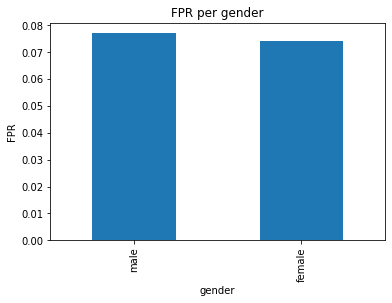

In [50]:
my_plot = dfprs.plot(kind='bar', legend=None, title="FPR per " + identifier)
my_plot.set_xlabel(identifier)
my_plot.set_ylabel("FPR")

In [51]:
dfnrs = pd.DataFrame(data={"identifier": identifiers, "FNR":fnrs})
dfnrs = dfnrs.groupby("identifier").sum().sort_values(by=["FNR"],ascending=False)

dfnrs.head()

,FNR
identifier,
female,0.07240
male,0.06897


Text(0, 0.5, 'FNR')

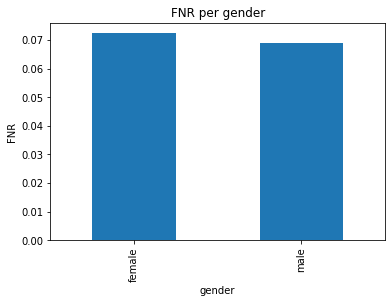

In [52]:
my_plot = dfnrs.plot(kind='bar', legend=None, title="FNR per " + identifier)
my_plot.set_xlabel(identifier)
my_plot.set_ylabel("FNR")

#### Calculate FNED and FPED

In [53]:
fped = 0
fned = 0

for _fpr, _fnr in zip(fprs, fnrs) :
    fped += abs(global_fpr - fpr)
    fned += abs(global_fnr - fnr)

print()
print("FPED: ", fped)
print("FNED: ", fned)


FPED:  0.0027726351440278407
FNED:  0.0034306972826420867
